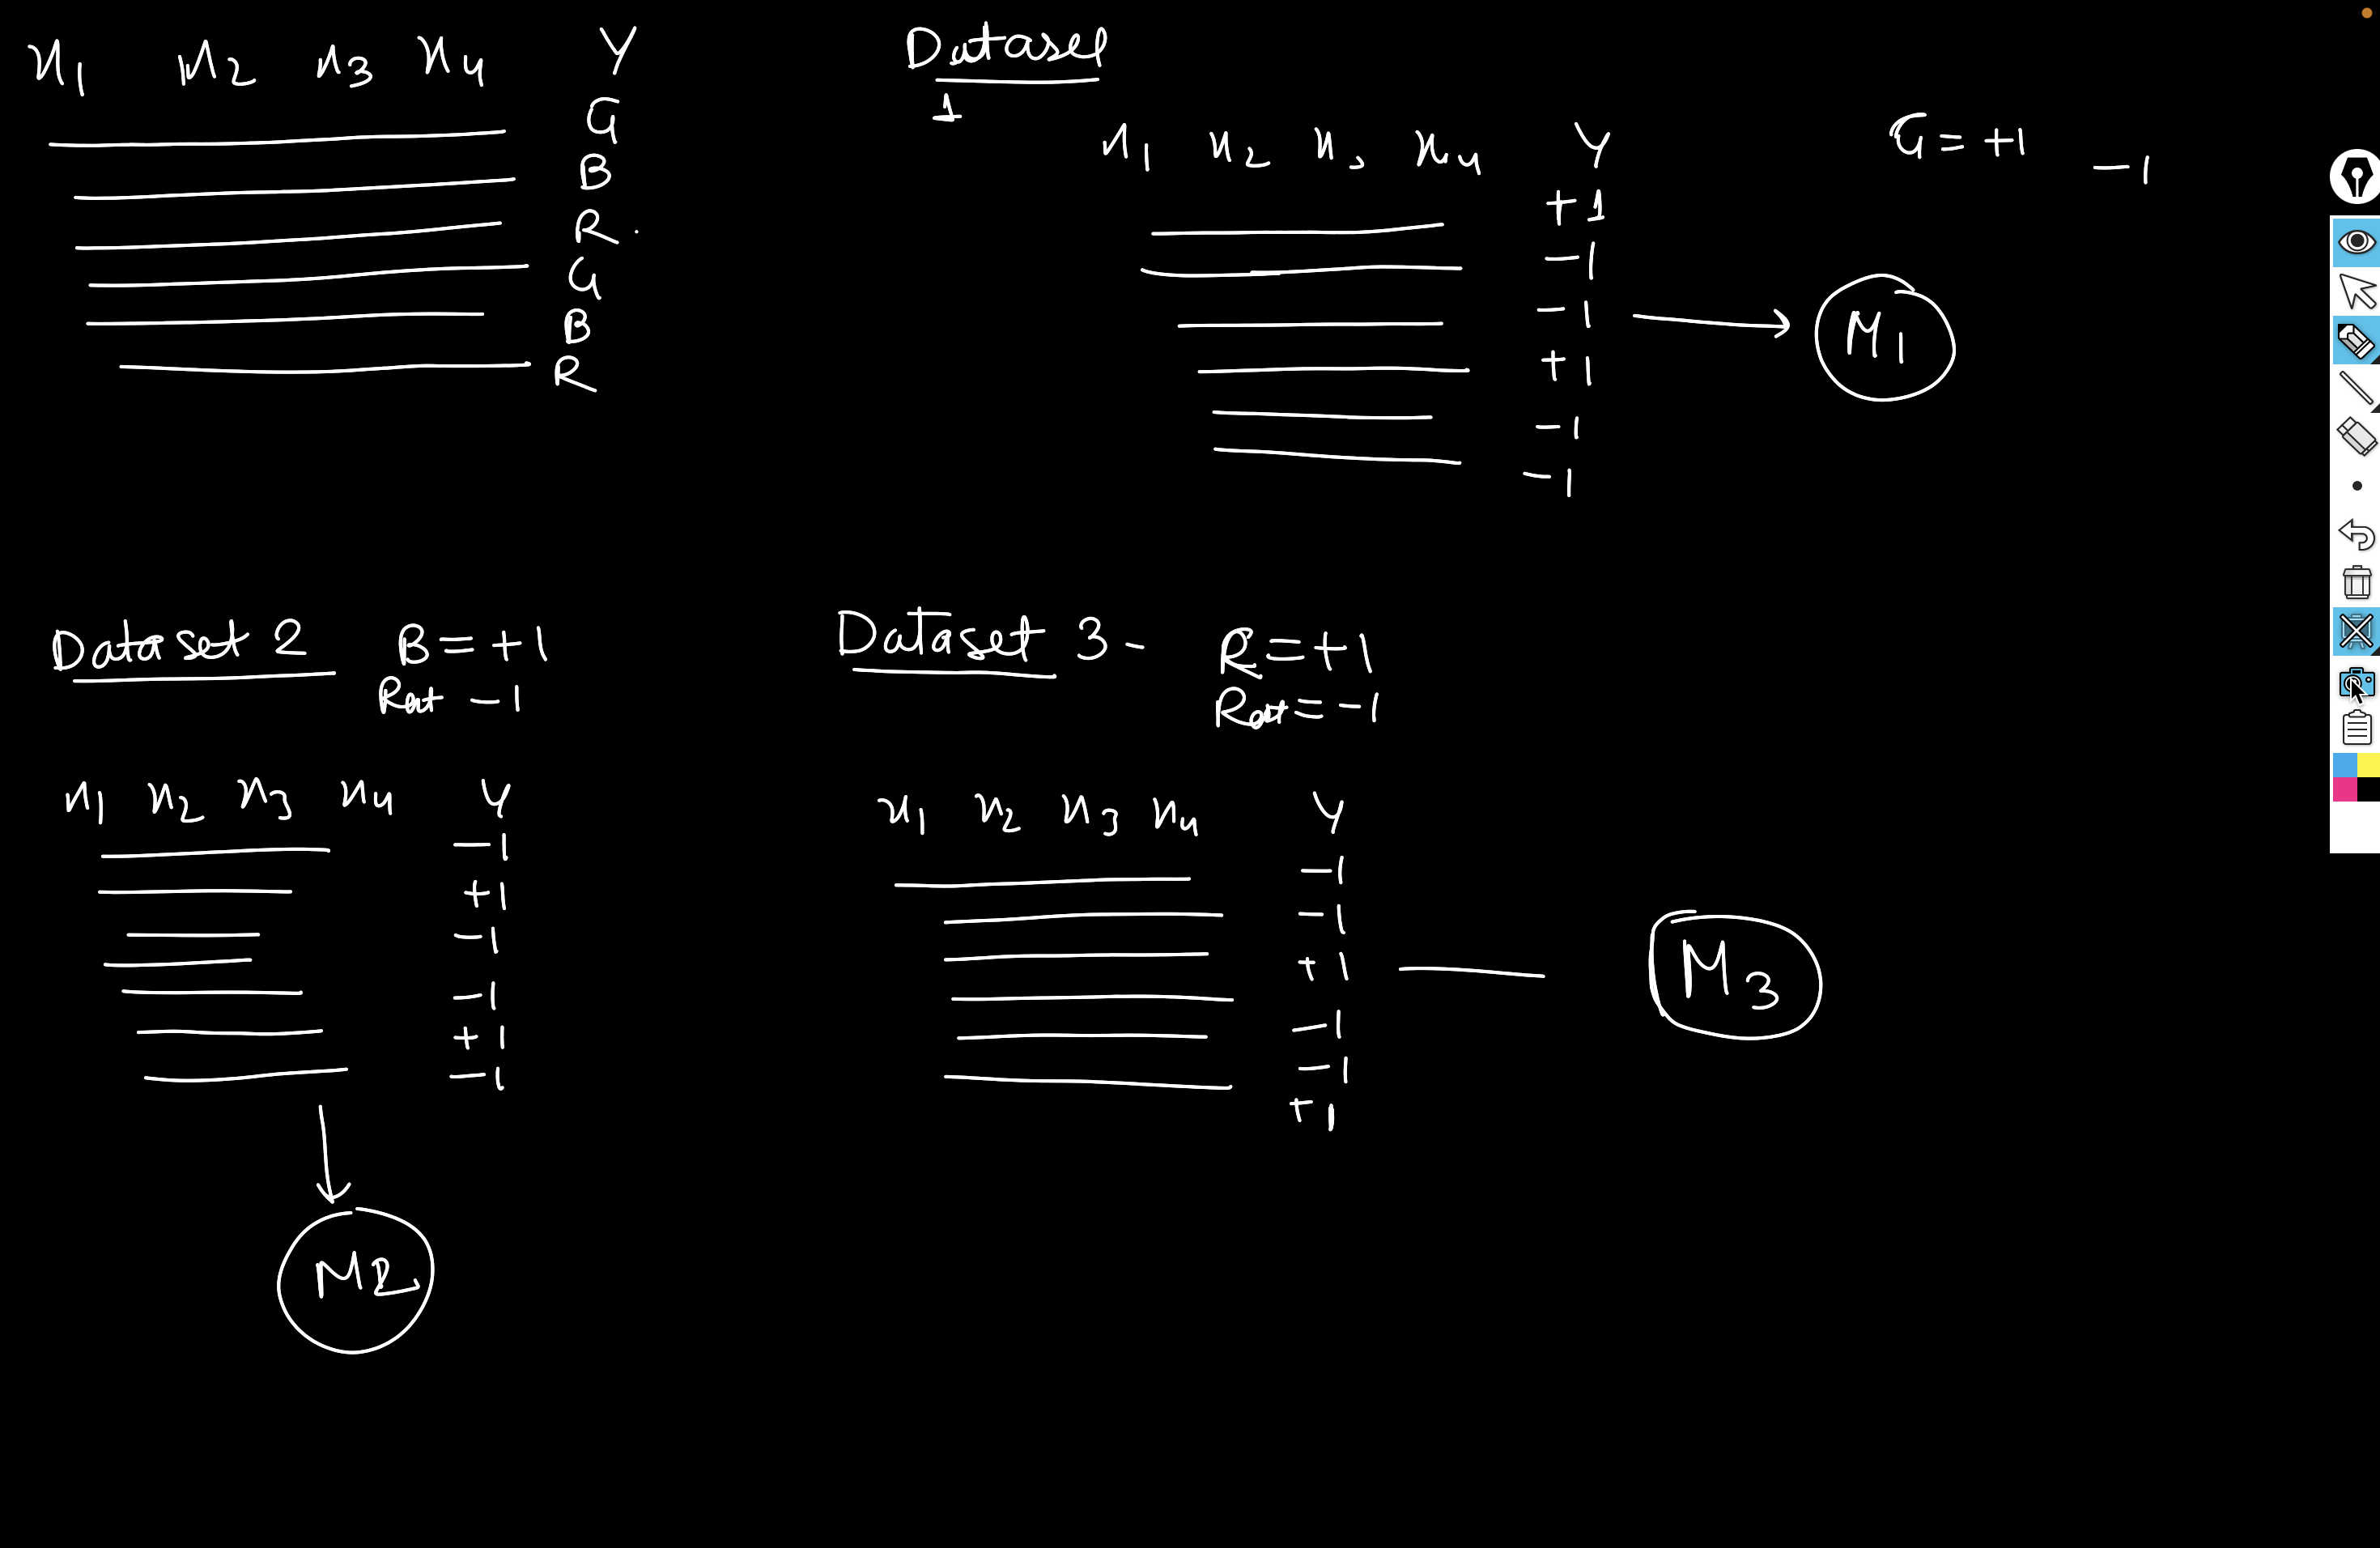

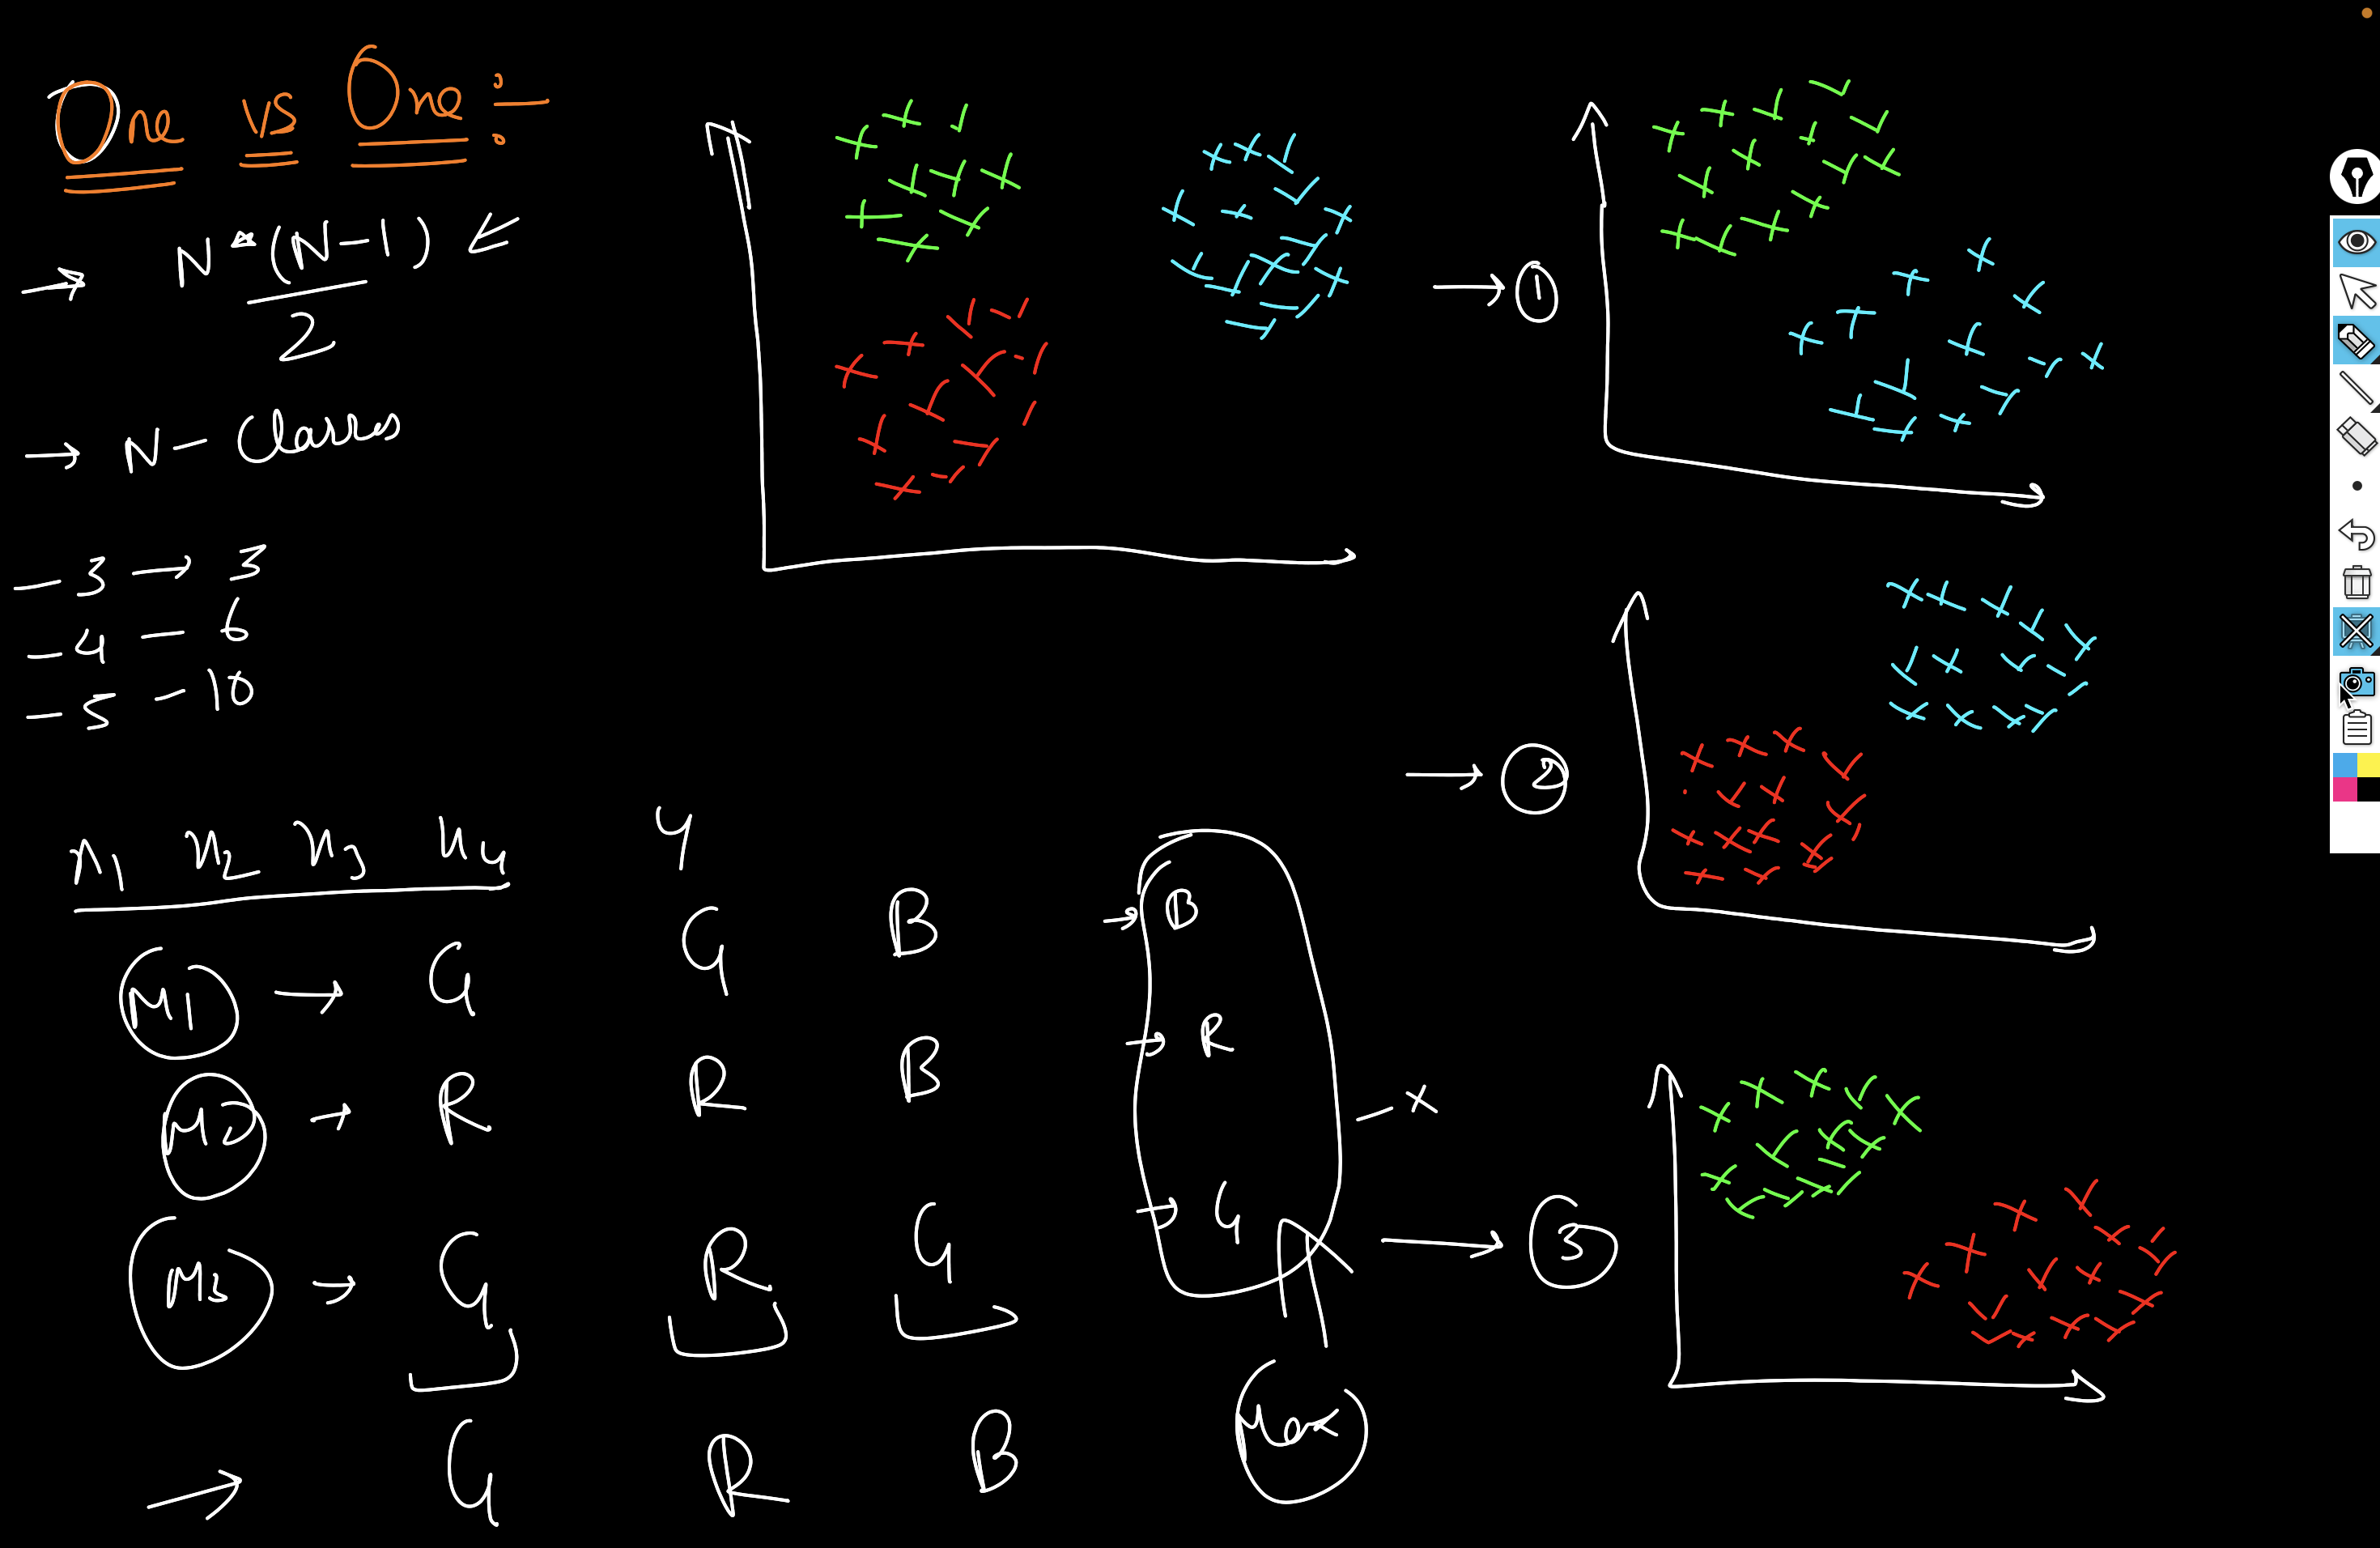

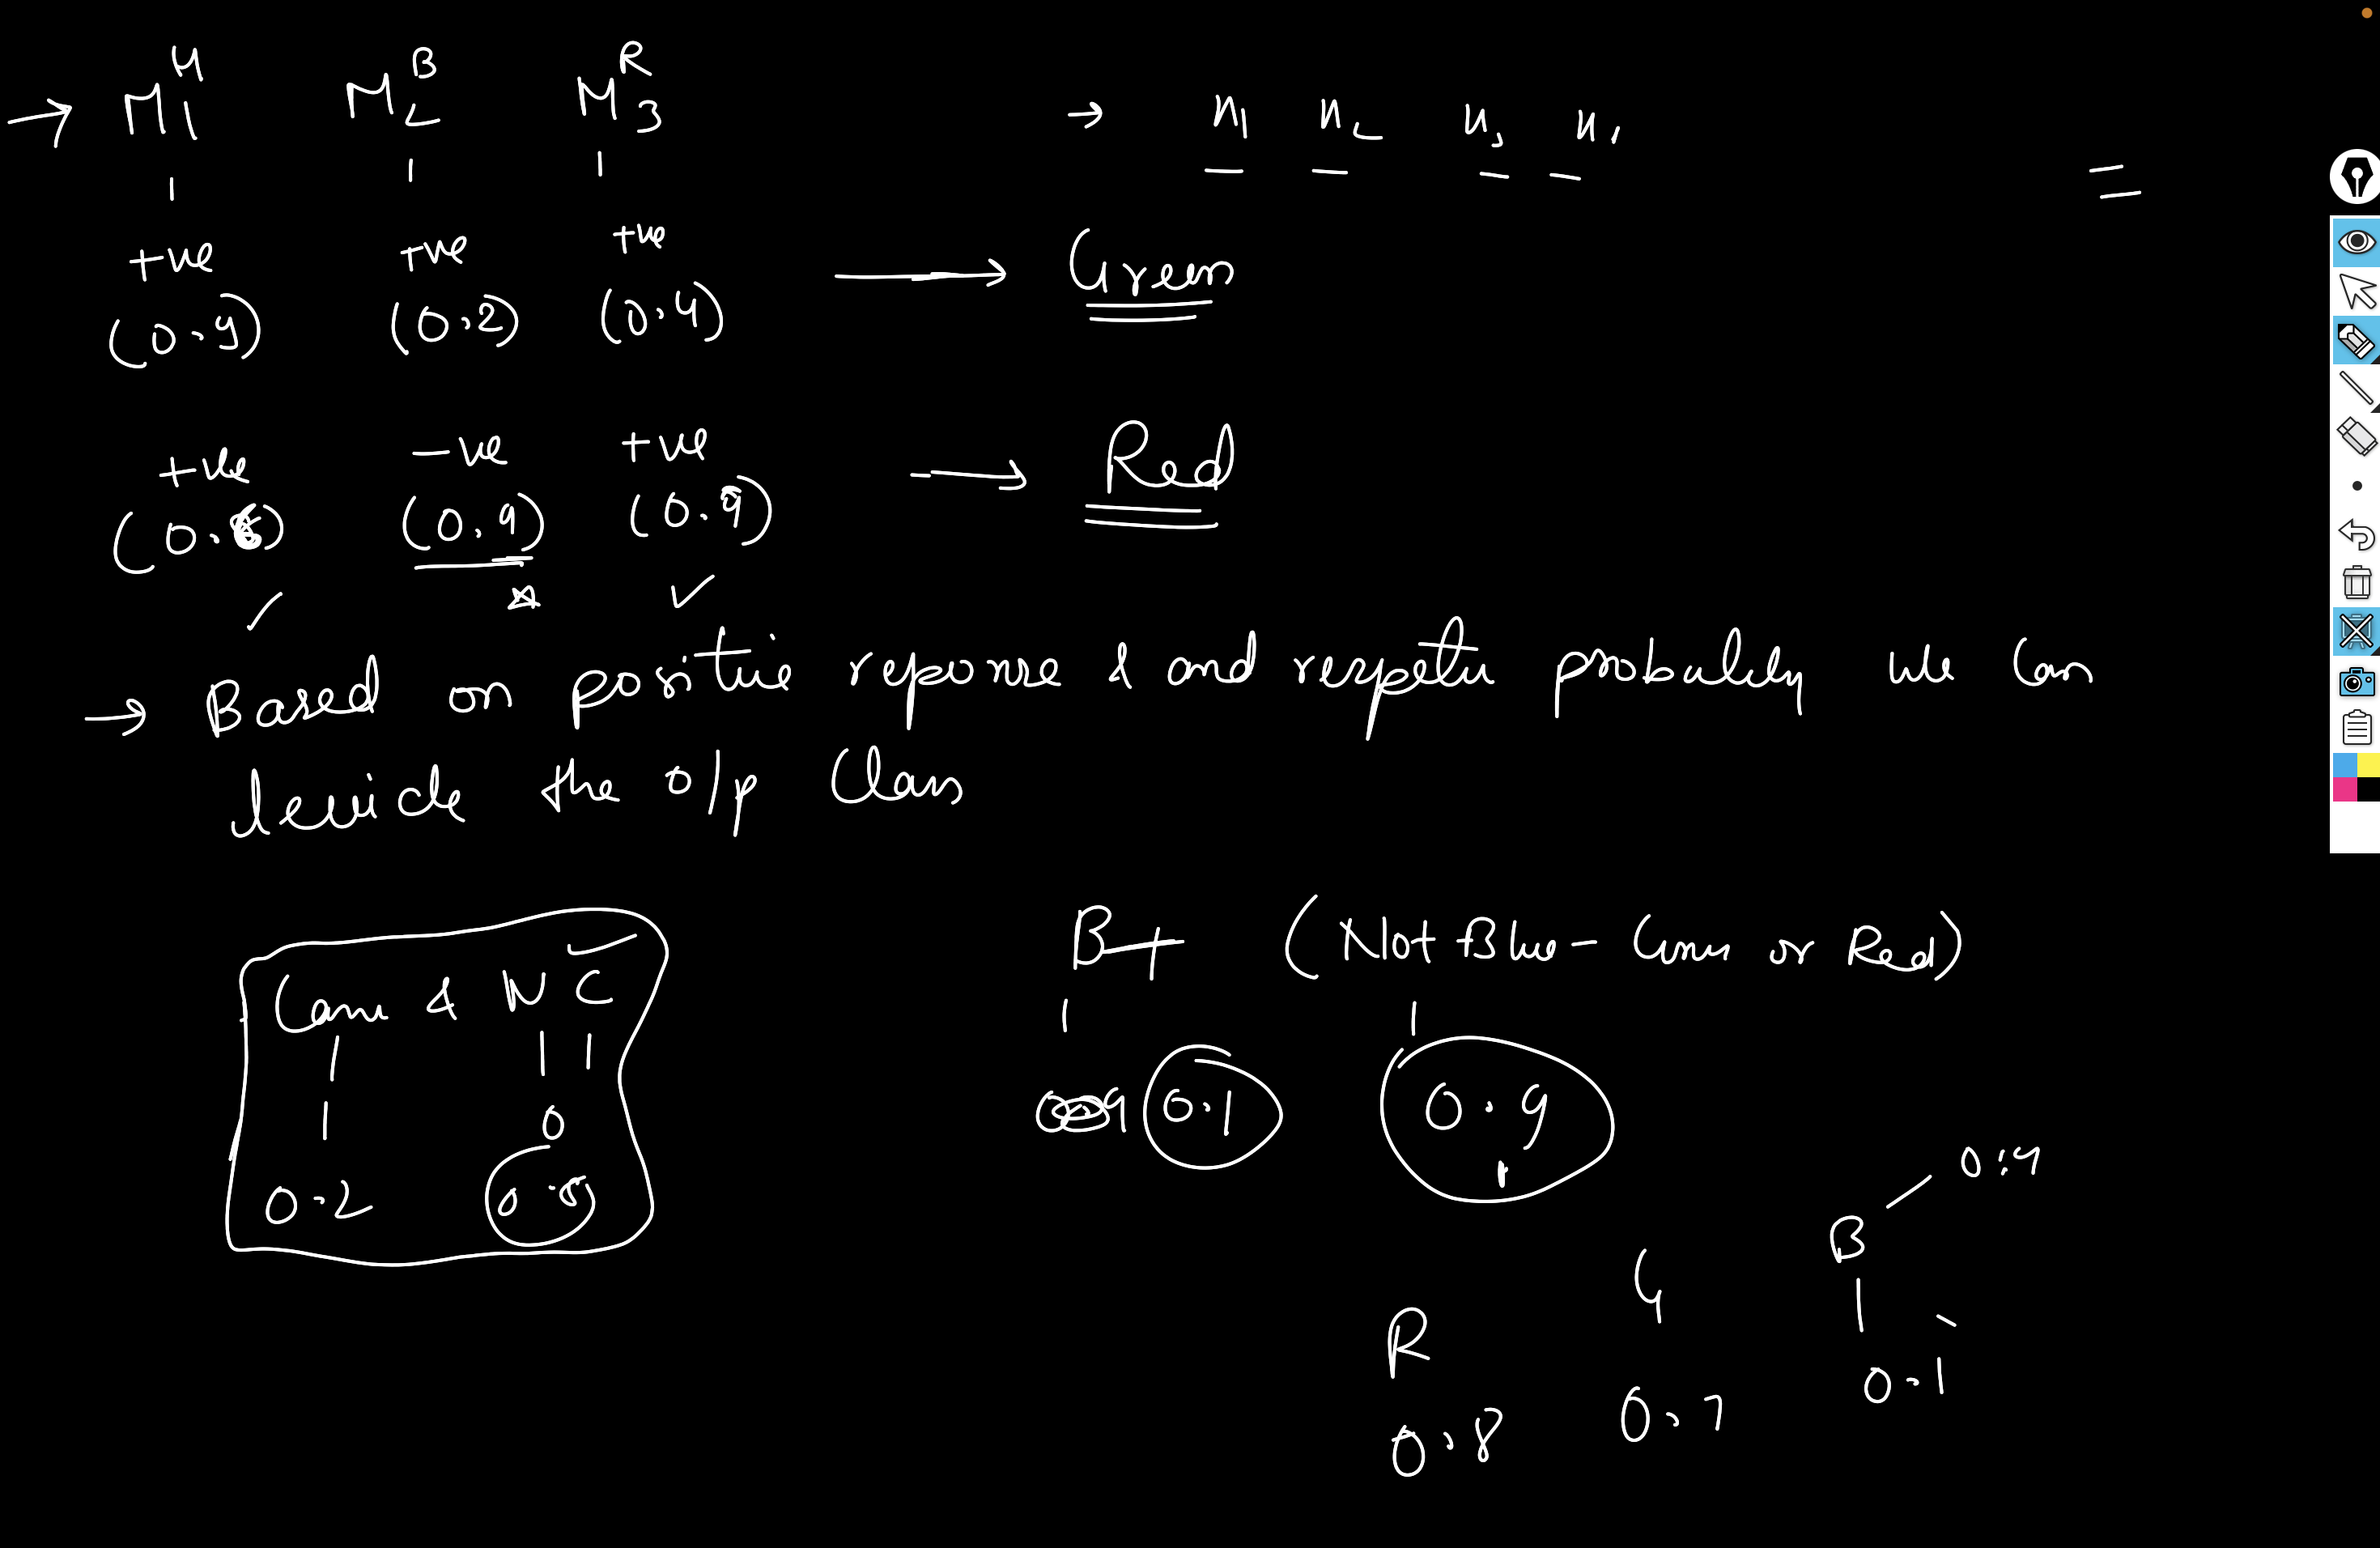

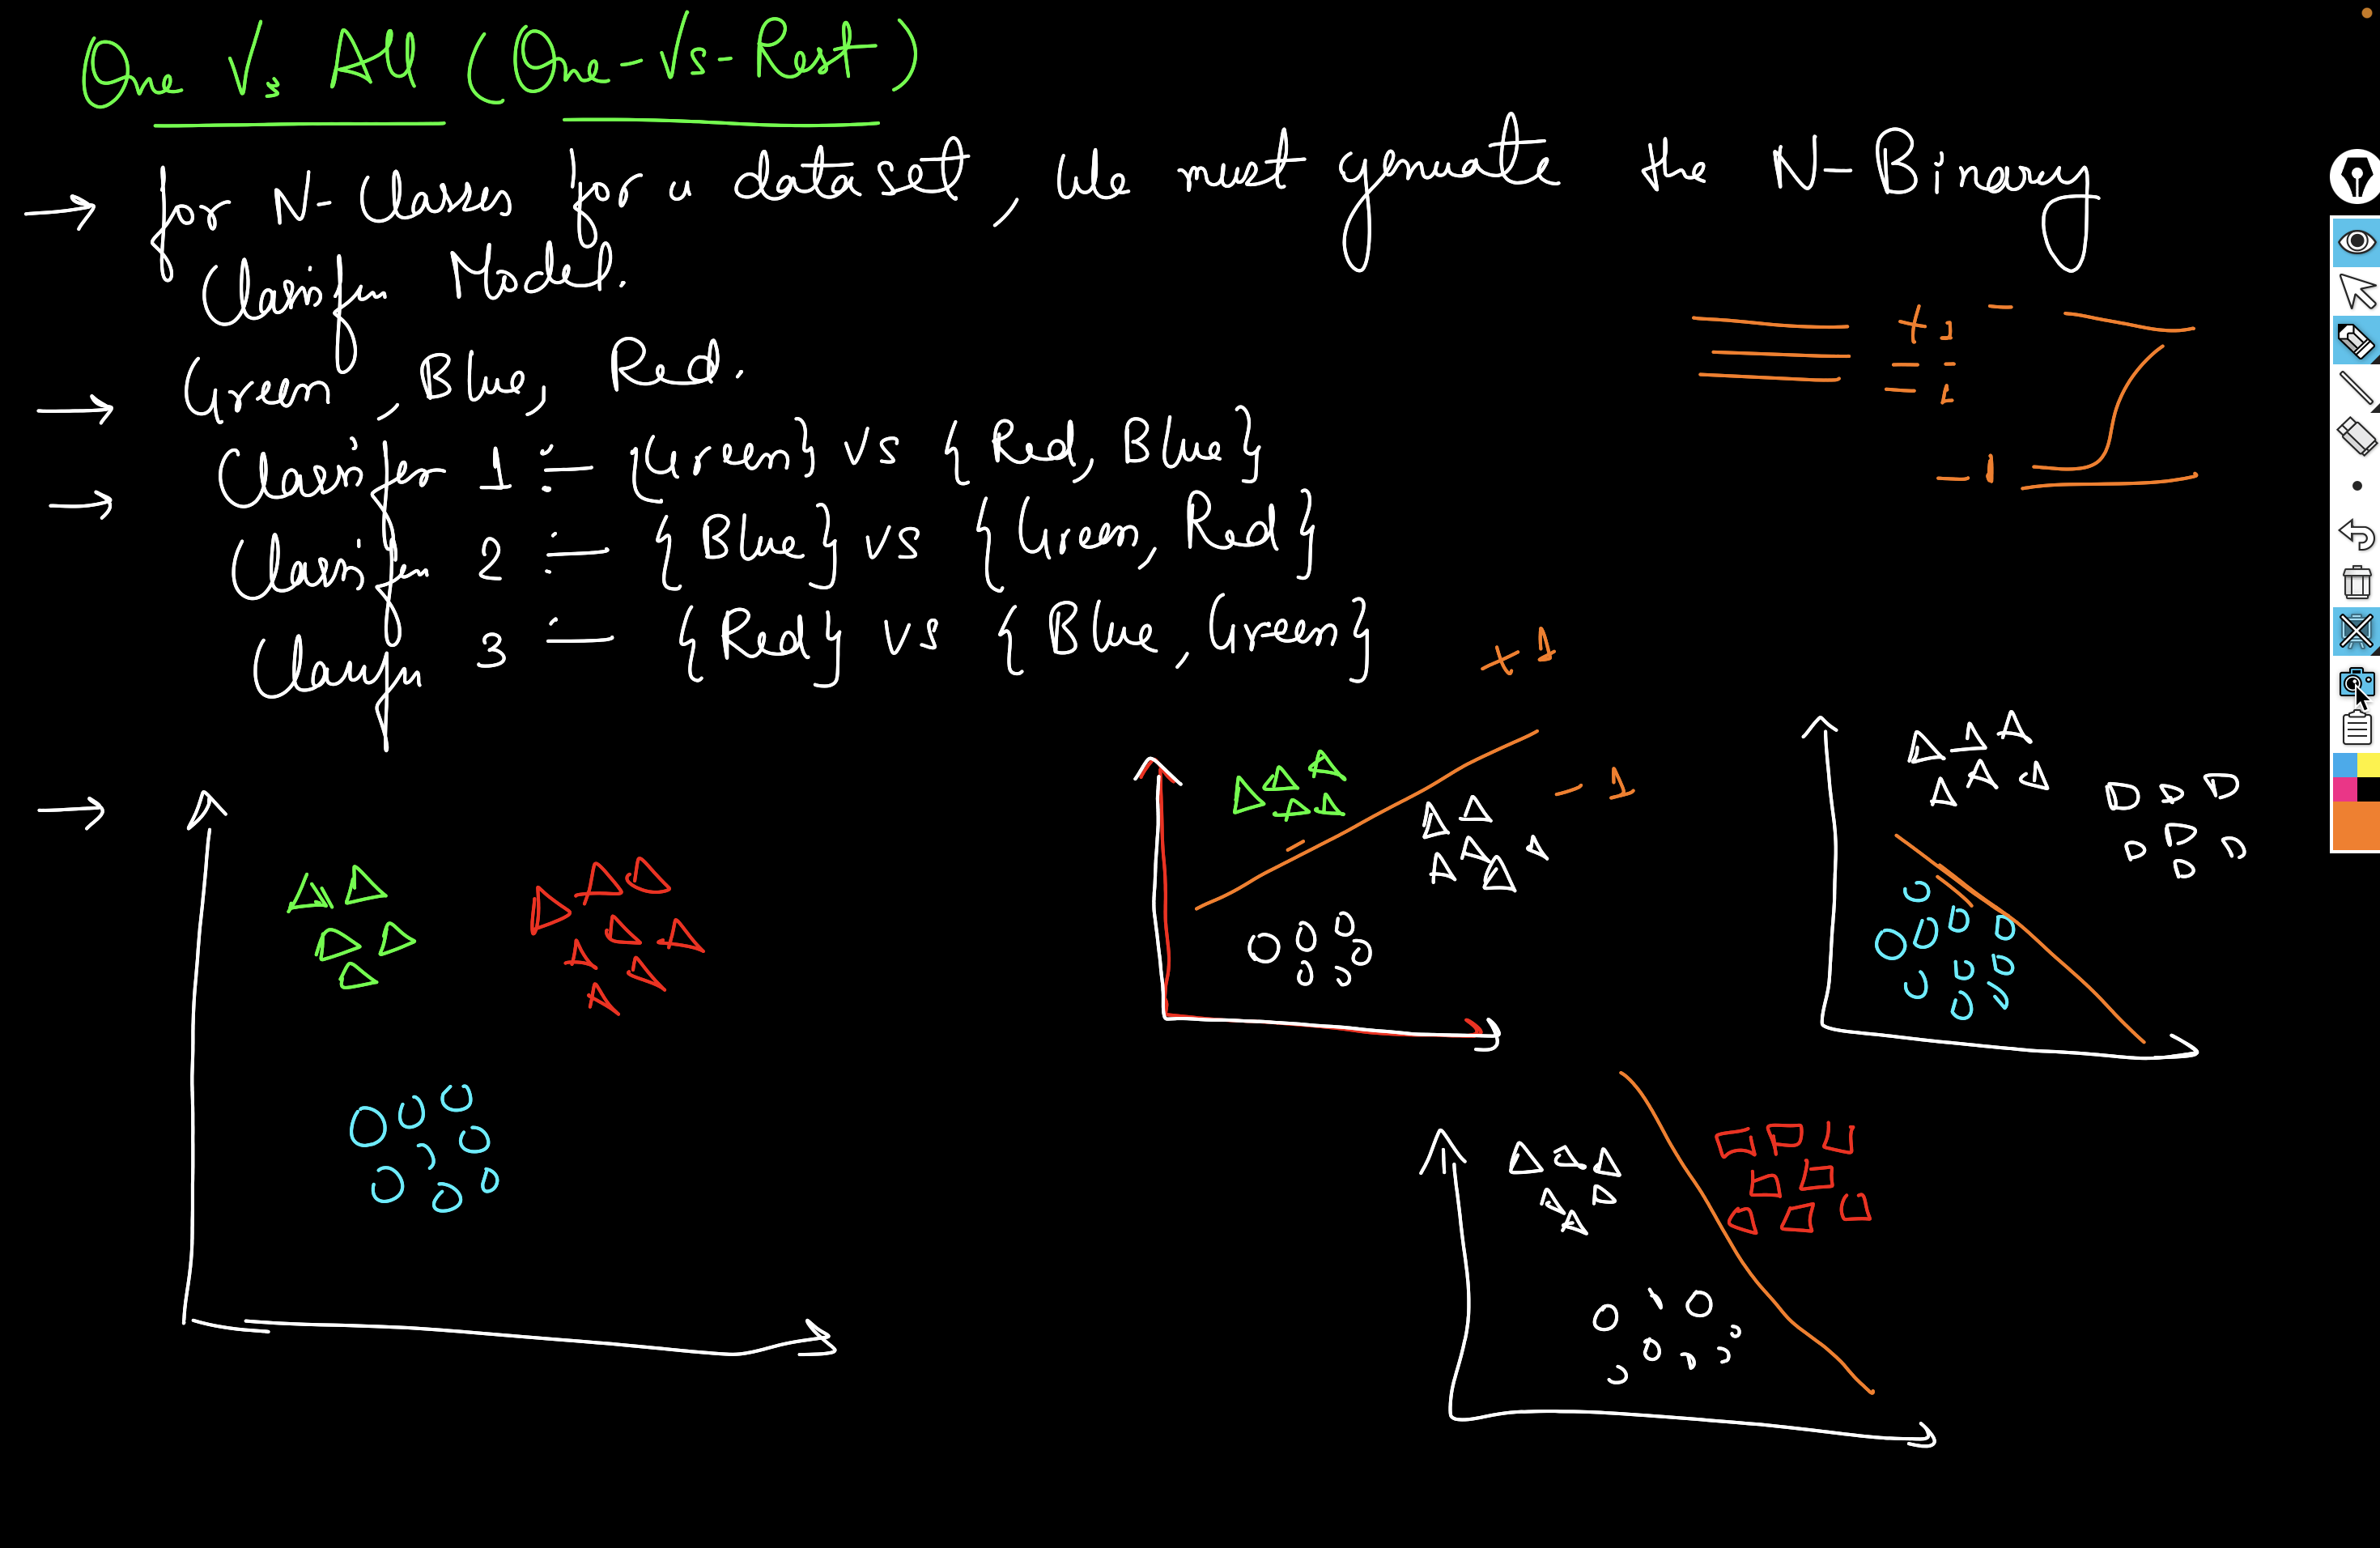

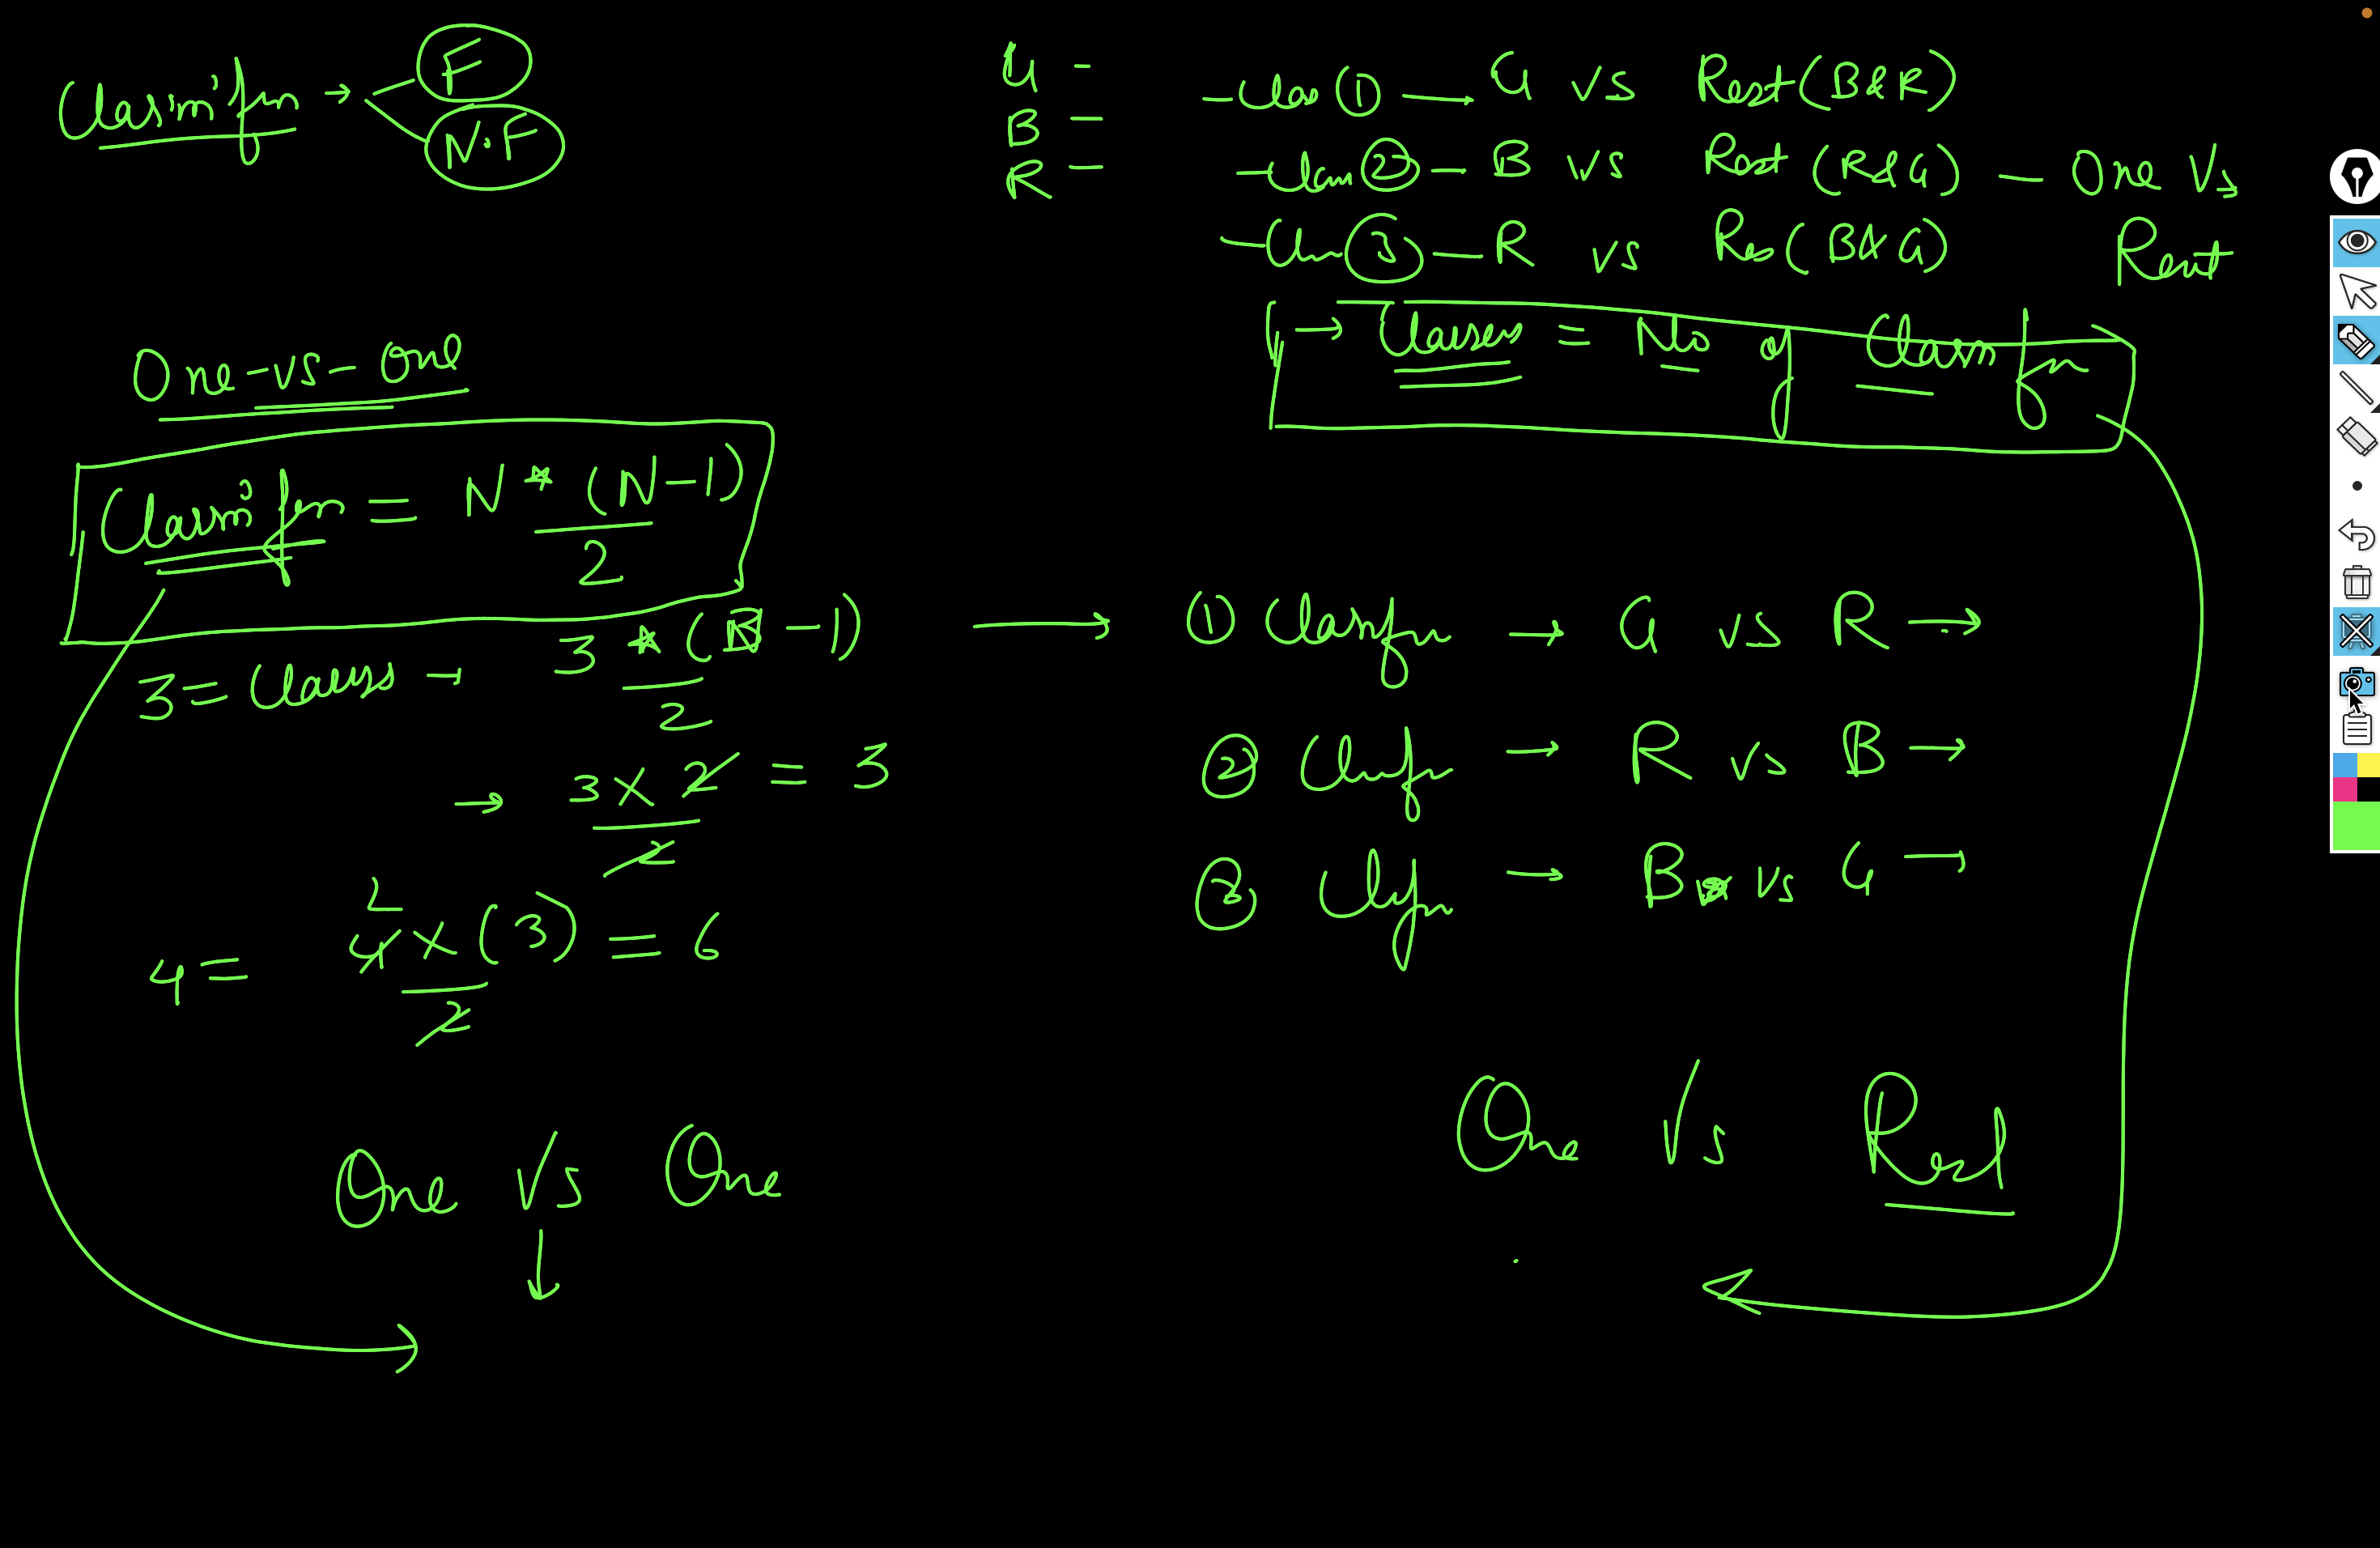

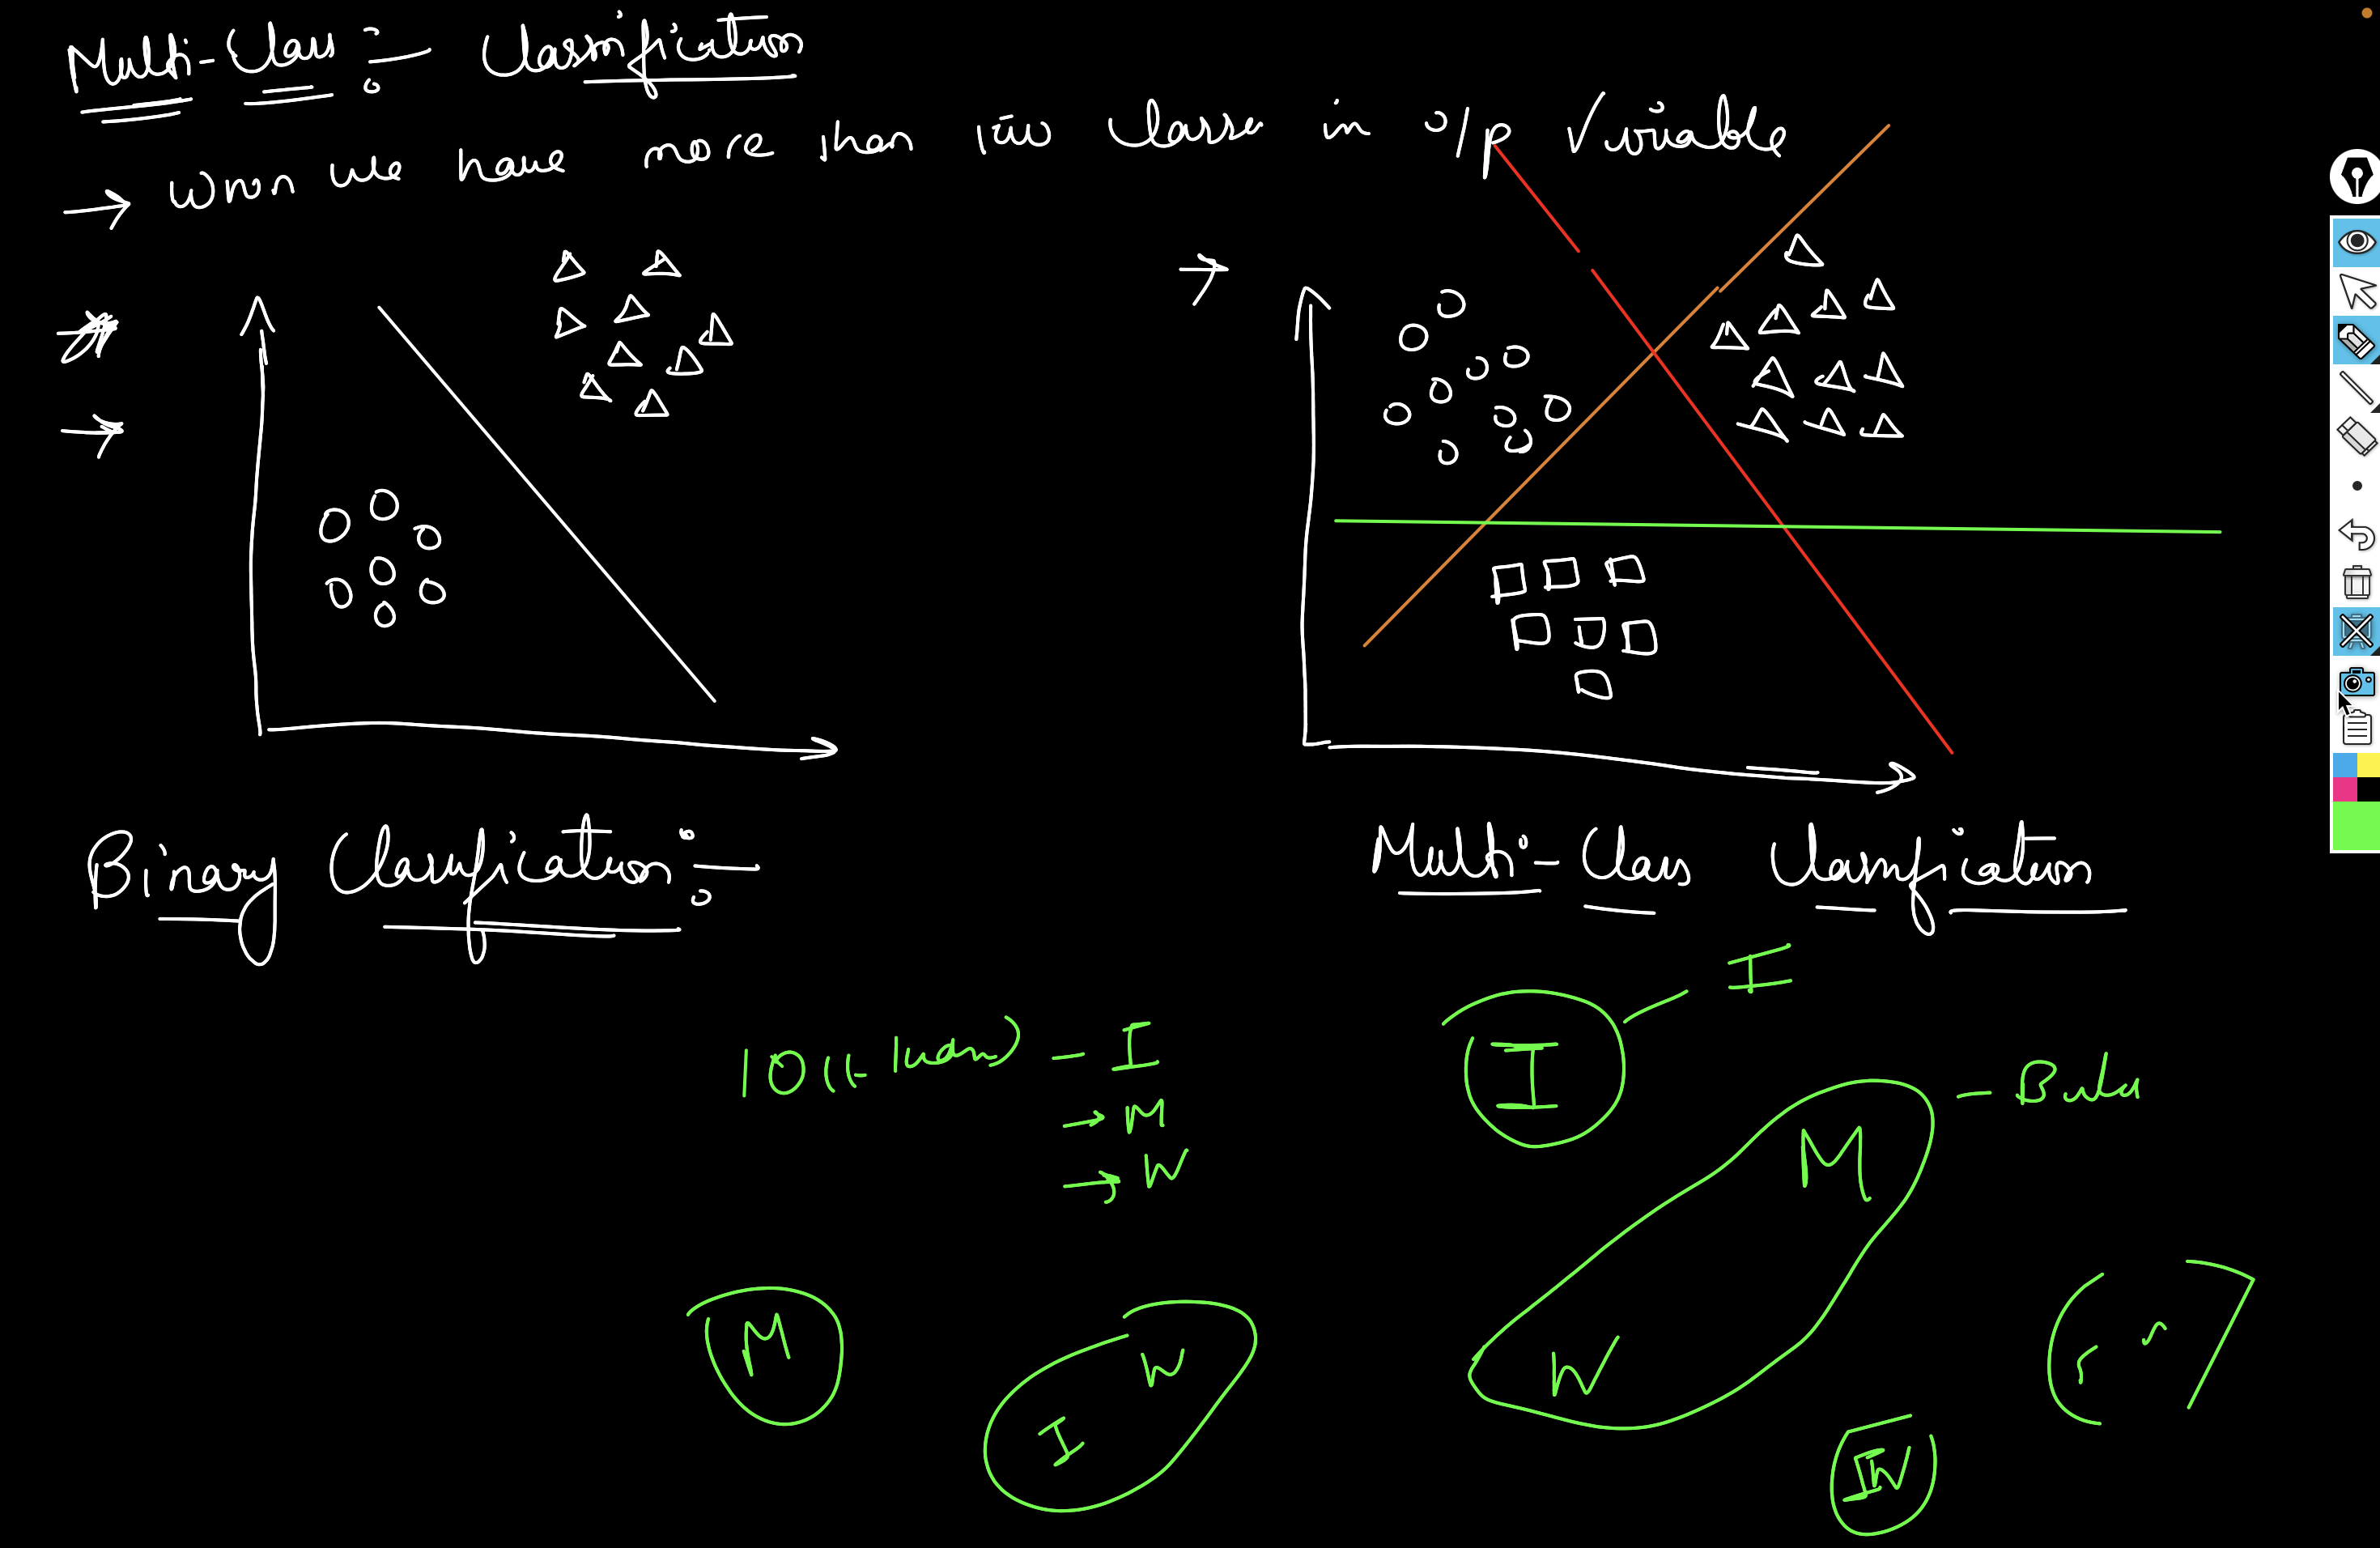

- The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
    
- The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.

# One-vs-rest
(OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

For example, given a multi-class classification problem with examples for each class ‘red,’ ‘blue,’ and ‘green‘. This could be divided into three binary classification datasets as follows:

    Binary Classification Problem 1: red vs [blue, green]
    Binary Classification Problem 2: blue vs [red, green]
    Binary Classification Problem 3: green vs [red, blue]


# One-vs-One

(OvO for short) is another  method for using binary classification algorithms for multi-class classification.

Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

For example, consider a multi-class classification problem with four classes: ‘red,’ ‘blue,’ and ‘green,’ ‘yellow.’ This could be divided into six binary classification datasets as follows:

    Binary Classification Problem 1: red vs. blue
    Binary Classification Problem 2: red vs. green
    Binary Classification Problem 3: red vs. yellow
    Binary Classification Problem 4: blue vs. green
    Binary Classification Problem 5: blue vs. yellow
    Binary Classification Problem 6: green vs. yellow


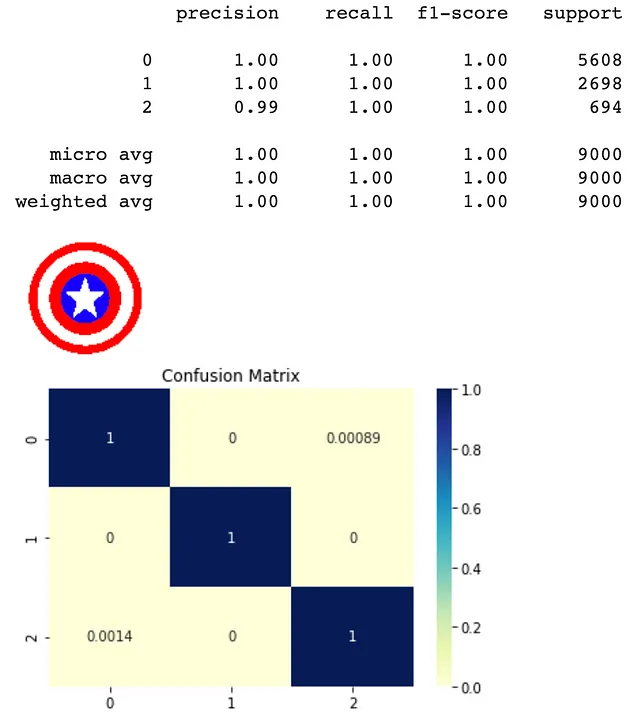

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as snss


In [4]:
data=sns.load_dataset("Iris")

In [5]:
data

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [6]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
data["species"].value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

In [8]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
data['species'] = data['species'].replace({'setosa':1, 'versicolor':2, 'virginica':3})

In [10]:
data

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['species'], test_size=0.3,random_state=10)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


# One vs Rest

In [34]:
model=LogisticRegression()

ovr=OneVsRestClassifier(model)

ovr.fit(X_train,y_train)

y_pred=ovr.predict(X_test)

In [18]:
y_pred

array([2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 1, 2, 1, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 1,
       3], dtype=int64)

In [19]:
from sklearn import metrics

In [20]:
metrics.accuracy_score(y_test,y_pred)

metrics.recall_score(y_test,y_pred,average="macro")

metrics.recall_score(y_test,y_pred,average="macro")

metrics.precision_score(y_test,y_pred,average="macro")

metrics.f1_score(y_test,y_pred,average="macro")

cm=metrics.confusion_matrix(y_test,y_pred)
cm

0.9555555555555556

Text(24.0, 0.5, 'Truth or Actual Value')

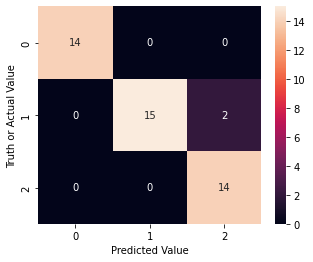

In [30]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

# One vs One

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['species'], test_size=0.3,random_state=10)

In [33]:
from sklearn.multiclass import OneVsOneClassifier

In [38]:
model1=LogisticRegression()

ovo=OneVsOneClassifier(model1)

ovo.fit(X_train,y_train)

y_pred=ovo.predict(X_test)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
f1_score 1.0
[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]


Text(24.0, 0.5, 'Truth or Actual Value')

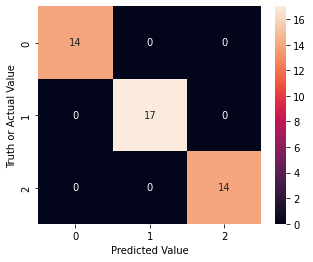

In [40]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy_score",accuracy_score)


recall_score=metrics.recall_score(y_test,y_pred,average="macro")
print("recall_score",recall_score)

precision_score=metrics.precision_score(y_test,y_pred,average="macro")
print("precision_score",precision_score)


f1_score=metrics.f1_score(y_test,y_pred,average="macro")
print("f1_score",f1_score)


cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')